# Problem 1
ロジスティック回帰 + L2正則化

学習データを$(x_i, y_i)_{i=1}^n,\  x_i\in \mathbb{R}^2,\ y_i\in \{-1,1\}$とする。
$$J\colon \mathbb{R}^2\to \mathbb{R}$$
$$J(w) = \frac{1}{n}\sum_{i=1}^n (\ln (1 + \exp(-y_iw^\top x_i)))  +\lambda w^\top w$$
としたとき、
$$\hat w = \arg\min_w J(w)$$
を求める。解析解は求められないので、最急降下法とニュートン法で上記の最適解を求める。

なお、$\mathrm{\sigma}(x) = 1/(1 + \exp(-x))$ (シグモイド関数)とすると
$$J(w) = -\frac{1}{n}\sum_{i=1}^n \log\sigma(y_iw^\top x) + \lambda w^\top w$$
と表せる。

時刻$t\in\mathbb{N}$における(最急降下法またはニュートン法の)更新を
$$w^{(t+1)} = w^{(t)} + \alpha^{(t)}d^{(t)}$$
とする。今回は簡単のため、$\alpha^{(t)}$は$t$によらない定数とする。(課題資料より)

## 最急降下法の式
$$d^{(t)} = -\nabla J(w^{(t)})$$
で求められる。

$$\nabla J(w) =  -\frac{1}{n}\sum_{i=1}^n [1-\sigma(y_iw^\top x)]y_ix_i + 2\lambda w$$
である。



## ニュートン法の式
$$d^{(t)} = -(\nabla^2 J(w^{(t)}))^{-1} \nabla J(w^{(t)})$$
で求められる。

$$\nabla^2 J(w) = \frac{1}{n} \sum_{i=1}^n \sigma(y_iw^\top x_i) (1- \sigma(y_iw^\top x_i)) x_ix_i^\top + 2\lambda I$$
である。 ($I$は単位行列)

## データセットの作成
教師データ$(x_i, y_i)_{i=1}^n$
$x_i\in \mathbb{R}^2,\ y_i\in \{-1,1\}$



In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from collections import namedtuple
Entry = namedtuple('Entry', ('x', 'y'))

In [5]:
from numpy.random import *

seed(1000) # 再現性のためにシード固定
n= 40
omega = randn(1,1) # 境界線の傾きのようなもの
noise = 0.8 * randn(n,1)

x = randn(n,2)
y = 2 * (omega * x[: , 0:1] + x[: , 1:2]   + noise > 0) - 1
# x[:, 0]だと1次元のベクトルが出てきて、行列演算が適用できない。
# x[:,0:1]とすることで0列目をn行1列の行列として抽出できる。

data = [Entry(elem[0].reshape(2,1), elem[1]) for elem in zip(list(x), list(y))]

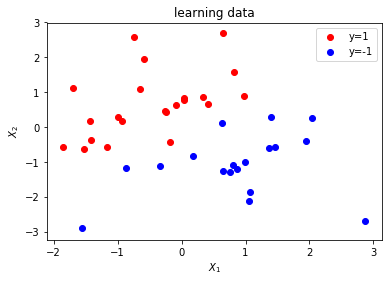

In [6]:
# 学習データをプロットする

# y=-1とy=1でデータセットを分離する

# y=1のデータ
data_p1 = [elem.x for elem in data if elem.y == 1]
# y=-1のデータ
data_m1 = [elem.x for elem in data if elem.y == -1]

# xの第1成分と第2成分を分離
data_p1x1 = [x[0] for x in data_p1]
data_p1x2 = [x[1] for x in data_p1]
data_m1x1 = [x[0] for x in data_m1]
data_m1x2 = [x[1] for x in data_m1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(data_p1x1,data_p1x2, c='red', label='y=1')
ax.scatter(data_m1x1, data_m1x2, c='blue', label='y=-1')

ax.set_title('learning data')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.legend(loc='upper right')

## 損失関数 + 正則化項
$\sigma(x) = 1/(1 + \exp(-x))$(シグモイド関数)としたとき
$$J(w) = -\frac{1}{n}\sum_{i=1}^n \log\sigma(y_iw^\top x_i) + \lambda w^\top w$$

In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
# 正則化項
lam = 1

In [9]:
# Jの定義
# wはベクトル
def J(w):
    # 総和の項の計算
    def f(entry):
        x = entry.x
        y = entry.y
        ywx = y * np.matmul(w.T, x)
        return np.log(sigmoid(ywx))
    return -(1/n) * sum([f(entry) for entry in data]) + lam * np.matmul(w.T, w)


## 最急降下法の実装
$$\nabla J(w) =  -\frac{1}{n}\sum_{i=1}^n [1-\sigma(y_iw^\top x)]y_ix_i + 2\lambda w$$
$$d^{(t)} = -\nabla J(w^{(t)})$$


In [10]:
# ∇Jの定義
def nablaJ(w):
    def f(entry):
        x = entry.x
        y = entry.y
        ywx = y * np.matmul(w.T, x)
        return (1-sigmoid(ywx)) * y * x
    return -(1/n) * sum([f(entry) for entry in data]) + 2 * lam * w
    

In [84]:
# 更新ベクトルの計算 (w(t+1)= w(t) + alpha(t) d(t) のd(t))
def delta(w):
     return - nablaJ(w)

alpha = 0.1 # tによらない定数とする。

In [85]:
numIterations = 100
wlist = []
w0 = np.array([[0],[0]])# wの初期値
wlist.append(w0)

for i in range(1, numIterations):
    wold = wlist[i-1]
    wnew = wold + alpha * delta(wold)
    wlist.append(wnew)

wresult = wlist[-1] # 再急降下法の結果

print("w, j")

jlist = [J(w) for w in wlist]
for w, j in zip(wlist, jlist):
    print(w,j)


w, j
[[0]
 [0]] [[0.69314718]]
[[-0.03226266]
 [ 0.04271519]] [[0.66798068]]
[[-0.05674535]
 [ 0.0749763 ]] [[0.65357338]]
[[-0.07533217]
 [ 0.09935001]] [[0.6453186]]
[[-0.08945098]
 [ 0.11777337]] [[0.64058403]]
[[-0.10018186]
 [ 0.13170561]] [[0.63786574]]
[[-0.1083419 ]
 [ 0.14224592]] [[0.63630369]]
[[-0.11454965]
 [ 0.15022283]] [[0.63540539]]
[[-0.11927387]
 [ 0.1562614 ]] [[0.63488849]]
[[-0.12287016]
 [ 0.16083358]] [[0.63459091]]
[[-0.12560846]
 [ 0.16429601]] [[0.63441952]]
[[-0.12769389]
 [ 0.16691834]] [[0.63432079]]
[[-0.12928237]
 [ 0.16890456]] [[0.6342639]]
[[-0.13049248]
 [ 0.17040906]] [[0.63423111]]
[[-0.13141447]
 [ 0.1715487 ]] [[0.6342122]]
[[-0.13211701]
 [ 0.17241198]] [[0.63420131]]
[[-0.13265238]
 [ 0.17306592]] [[0.63419502]]
[[-0.13306039]
 [ 0.17356127]] [[0.6341914]]
[[-0.13337137]
 [ 0.1739365 ]] [[0.63418931]]
[[-0.13360841]
 [ 0.17422072]] [[0.63418811]]
[[-0.1337891]
 [ 0.174436 ]] [[0.63418741]]
[[-0.13392684]
 [ 0.17459906]] [[0.63418701]]
[[-0.1340

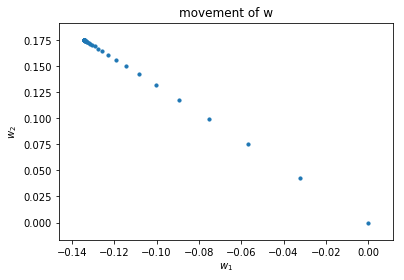

In [86]:
# wの収束の様子

w1list = [w[0] for w in wlist]
w2list = [w[1] for w in wlist]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(w1list, w2list, s=10)

ax.set_title('movement of w')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$');


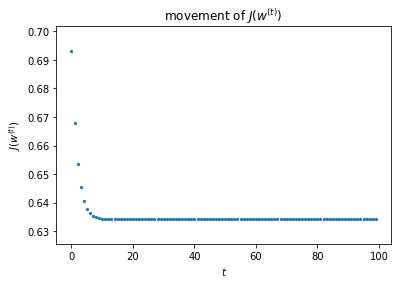

In [87]:
# J(w)の収束の様子
iteration = range(0,numIterations)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(iteration, jlist, s=5)

ax.set_title('movement of $J(w^{(t)})$')
ax.set_xlabel('$t$')
ax.set_ylabel('$J(w^{(t)})$');

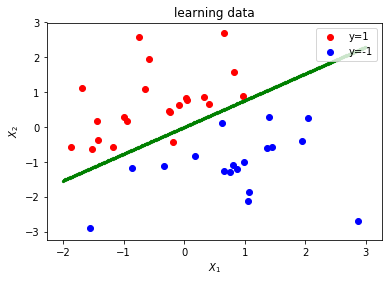

In [88]:
# 学習データ + 識別線

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 学習データ
ax.scatter(data_p1x1,data_p1x2, c='red', label='y=1')
ax.scatter(data_m1x1, data_m1x2, c='blue', label='y=-1')

ax.set_title('learning data')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.legend(loc='upper right');

# 識別線
linex = np.arange(-2,3,0.01)
# w1*x + w2*y = 0より、y = -(w1/w2)x が識別線
liney = -wresult[0]/wresult[1] * linex
ax.scatter(linex, liney,c='green', s=5);


## ニュートン法の実装
$$\nabla^2 J(w) = \frac{1}{n} \sum_{i=1}^n \sigma(y_iw^\top x_i) (1- \sigma(y_iw^\top x_i)) x_ix_i^\top + 2\lambda I$$
$$d^{(t)} = -(\nabla^2 J(w^{(t)}))^{-1} \nabla J(w^{(t)})$$

In [89]:
def hessianJ(w):
    # 総和の項
    def f(entry):
        x = entry.x
        y = entry.y
        ywx =  y * np.matmul(w.T,x)
        return sigmoid(ywx) * (1-sigmoid(ywx)) * np.matmul(x, x.T)
    return (1/n) * sum([f(entry) for entry in data] + 2 * lam * np.eye(2))

In [90]:
def delta(w):
    return -np.matmul(np.linalg.inv(hessianJ(w)), nablaJ(w))

alpha = 0.1 # 最急降下法と同じ値

In [91]:
numIterations = 100
wlist = []
w0 = np.array([[0],[0]])# wの初期値
wlist.append(w0)

for i in range(1, numIterations):
    wold = wlist[i-1]
    wnew = wold + alpha * delta(wold)
    wlist.append(wnew)

wresult = wlist[-1] # 再急降下法の結果

print("w, j")

jlist = [J(w) for w in wlist]
for w, j in zip(wlist, jlist):
    print(w,j)


w, j
[[0]
 [0]] [[0.69314718]]
[[-0.01338363]
 [ 0.01744329]] [[0.68196676]]
[[-0.02543045]
 [ 0.03314421]] [[0.6729094]]
[[-0.03627627]
 [ 0.04727967]] [[0.66557037]]
[[-0.04604226]
 [ 0.06000754]] [[0.65962278]]
[[-0.05483674]
 [ 0.07146904]] [[0.65480236]]
[[-0.06275679]
 [ 0.08179072]] [[0.65089527]]
[[-0.06988956]
 [ 0.09108619]] [[0.64772836]]
[[-0.07631331]
 [ 0.09945751]] [[0.64516141]]
[[-0.08209848]
 [ 0.10699649]] [[0.64308077]]
[[-0.08730843]
 [ 0.11378577]] [[0.64139434]]
[[-0.09200023]
 [ 0.11989972]] [[0.64002749]]
[[-0.09622526]
 [ 0.12540535]] [[0.63891968]]
[[-0.10002983]
 [ 0.13036301]] [[0.63802185]]
[[-0.10345566]
 [ 0.1348271 ]] [[0.63729423]]
[[-0.10654033]
 [ 0.13884661]] [[0.63670458]]
[[-0.10931773]
 [ 0.14246568]] [[0.63622675]]
[[-0.11181837]
 [ 0.14572411]] [[0.63583955]]
[[-0.11406976]
 [ 0.14865775]] [[0.6355258]]
[[-0.11609669]
 [ 0.15129888]] [[0.63527157]]
[[-0.11792148]
 [ 0.1536766 ]] [[0.63506558]]
[[-0.11956424]
 [ 0.15581713]] [[0.63489868]]
[[-0.

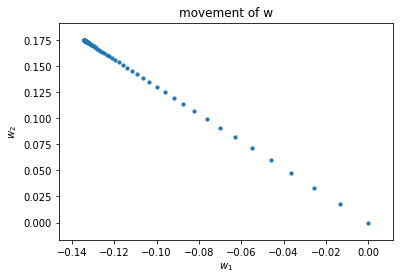

In [92]:
# wの収束の様子

w1list = [w[0] for w in wlist]
w2list = [w[1] for w in wlist]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(w1list, w2list, s=10)

ax.set_title('movement of w')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$');

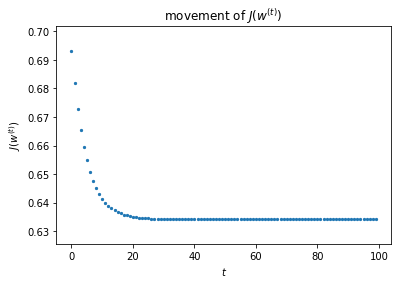

In [93]:
# J(w)の収束の様子
iteration = range(0,numIterations)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(iteration, jlist, s=5)

ax.set_title('movement of $J(w^{(t)})$')
ax.set_xlabel('$t$')
ax.set_ylabel('$J(w^{(t)})$');

## 問題点
* 正則化項の$\lambda$をどうするか
* 最急降下法とニュートン法の更新レート$\alpha$をどうするか

収束するように適当に選んだ。$\alpha$は大きくしすぎると振動したり無限大に発散したりする。

## メモ
* Python3.6.5

